In [281]:
import datetime

#
from collections import Counter

#
import collections

#
import pandas as pd
import numpy as np

#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib3

In [64]:
ref_arquivo = open('/content/drive/MyDrive/whats.txt', "r", encoding='utf-8')
arquivo = ref_arquivo.read()
print(arquivo)

13/04/2021 20:49 - As mensagens e as chamadas são protegidas com a criptografia de ponta a ponta e ficam somente entre você e os participantes desta conversa. Nem mesmo o WhatsApp pode ler ou ouvi-las. Toque para saber mais.
13/04/2021 20:46 - ‎+55 11 98793-6843 criou o grupo "Não sei nome"
13/04/2021 20:49 - ‎+55 11 98793-6843 adicionou você
13/04/2021 20:50 - +55 81 9957-6999: Grupo Rosa Matias
13/04/2021 20:50 - ‎+55 81 9957-6999 mudou o nome de "Não sei nome" para "Grupo Rosa Matias"
13/04/2021 20:50 - ‎+55 11 98793-6843 adicionou +55 13 99785-0435
13/04/2021 20:50 - Você agora é um admin do grupo
13/04/2021 20:50 - +55 11 98793-6843: Todos?
13/04/2021 20:51 - +55 11 93451-0402: <Arquivo de mídia oculto>
13/04/2021 20:51 - +55 81 9957-6999: Presrnte
13/04/2021 20:51 - +55 11 98793-6843: Okaaaay
13/04/2021 20:51 - +55 11 99122-8956: 👊🏿
13/04/2021 20:51 - Alexandre Tostes: ✌🏾👍🏾
13/04/2021 20:53 - Mirella Impacta: Yeah
13/04/2021 20:53 - ‎+55 11 95765-5550 mudou a imagem do grupo
13/0

In [95]:
datas_mensagens = re.split(r'(\d{2}/\d{2}/\d{4} \d{2}:\d{2}) - ', arquivo)[1:]

#    0          1         2         3
# ['data', 'mensagem', 'data', 'mensagem', '..']

In [243]:
dias_da_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

mensagens = []
for i in range(0, len(datas_mensagens), 2):
  data = datas_mensagens[i]
  mensagem = datas_mensagens[i+1]
  partes_mensagem = mensagem.split(': ', 1)
  if len(partes_mensagem) > 1:
    data = datetime.datetime.strptime(data, '%d/%m/%Y %H:%M')
    mensagens.append([data, partes_mensagem[0], partes_mensagem[1].strip(), data.weekday(), dias_da_semana[data.weekday()], data.hour])


In [244]:
n_mensagens = 0
for mensagem in mensagens:
  if mensagem[1] == 'Alexandre Tostes':
    n_mensagens += 1
n_mensagens

118

In [246]:
df = pd.DataFrame(mensagens, columns=['data', 'pessoa', 'mensagem', 'dia_semana', 'dia_semana_extenso', 'hora'])
df

,data,pessoa,mensagem,dia_semana,dia_semana_extenso,hora
0,2021-04-13 20:50:00,+55 81 9957-6999,Grupo Rosa Matias,1,Terça,20
1,2021-04-13 20:50:00,+55 11 98793-6843,Todos?,1,Terça,20
2,2021-04-13 20:51:00,+55 11 93451-0402,<Arquivo de mídia oculto>,1,Terça,20
3,2021-04-13 20:51:00,+55 81 9957-6999,Presrnte,1,Terça,20
4,2021-04-13 20:51:00,+55 11 98793-6843,Okaaaay,1,Terça,20
...,...,...,...,...,...,...
2191,2021-05-17 19:29:00,+55 13 99785-0435,Haha,0,Segunda,19
2192,2021-05-17 19:31:00,+55 11 93451-0402,Todo mundo lendo o grupo pra ver se não tem be...,0,Segunda,19
2193,2021-05-17 19:31:00,Mirella Impacta,hhahahahahaha,0,Segunda,19
2194,2021-05-17 19:32:00,+55 11 99122-8956,hauhauhauhaua,0,Segunda,19


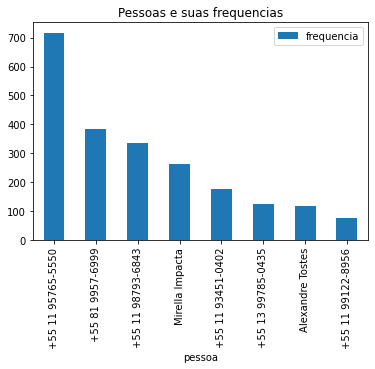

In [247]:
df_n_mensagens = df.groupby(['pessoa']).size().reset_index(name='frequencia')
df_n_mensagens = df_n_mensagens.sort_values(by=['frequencia'], ascending=False)
df_n_mensagens.plot(kind='bar', x = 'pessoa', y='frequencia', title='Pessoas e suas frequencias')

In [251]:
todas_palavras = []
stopped_words = ['com', 'para', 'não', 'n', 'de', 'do', 'da', 'das', 'dos', 'q',
                 'que', 'a', 'já', 'as', 'e', 'ele', 'eu', 'em', 'é', 'i', 'o', 'os', 'um', 'uma', '-', 'mas', 'no',
                 'nos', 'na', 'nas', 'nós', 'pra', 'só', 'se', 'tem', 'vou', 'mais', 'por', 'se']

for mensagem in mensagens:
  mensagem = mensagem[2]
  for palavra in re.split(r'[,.!? \n<>()]+', mensagem.lower()):
    if palavra and palavra not in stopped_words:
      todas_palavras.append(palavra)

freq_palavras = Counter(todas_palavras)


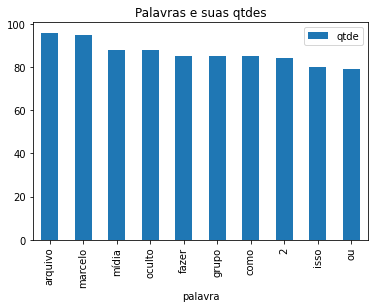

In [252]:
df_freq_palavras = pd.DataFrame(freq_palavras.items(), columns=['palavra', 'qtde'])
df_freq_palavras = df_freq_palavras.sort_values(by=['qtde'], ascending=False)
top_palavras = df_freq_palavras[:10]
top_palavras.plot(kind='bar', x='palavra', y='qtde', title='Palavras e suas qtdes')

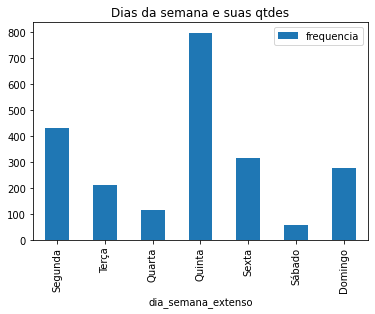

In [253]:
df_dia_semana = df[['dia_semana', 'dia_semana_extenso']].groupby(['dia_semana', 'dia_semana_extenso']).size().reset_index(name='frequencia')
df_dia_semana.plot(kind='bar', x='dia_semana_extenso', y='frequencia', title='Dias da semana e suas qtdes')

In [298]:
df_hora = df[['hora']]
df_hora['qtde'] = 1

df_hora_zero = pd.DataFrame([[i, 0] for i in range(0, 24)], columns=df_hora.columns)

df_hora_fix = pd.concat([df_hora, df_hora_zero])
df_hora_fix


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hora,qtde
0,20,1
1,20,1
2,20,1
3,20,1
4,20,1
...,...,...
19,19,0
20,20,0
21,21,0
22,22,0


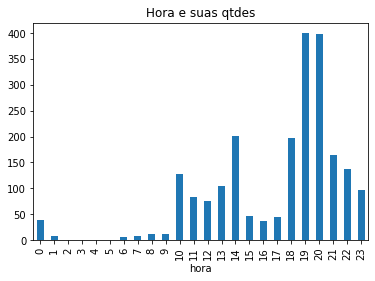

In [309]:
df_hora_2 = df_hora_fix.groupby(['hora'])['qtde'].sum()
df_hora_2.plot(kind='bar', x='hora', y='frequencia', title='Hora e suas qtdes')

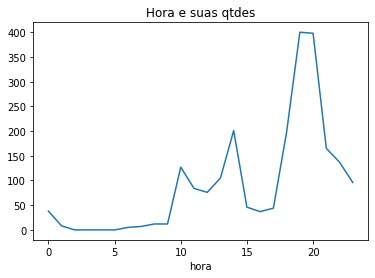

In [312]:
df_hora_2.plot(kind='line', x='hora', y='frequencia', title='Hora e suas qtdes')

In [8]:
lista_pessoas

[]

In [22]:
dict_pessoas = dict(Counter(lista_pessoas))
pessoas_df = pd.DataFrame(dict_pessoas.items(), columns=['Pessoa', 'Frequencia'])
pessoas_df = pessoas_df.sort_values(by=['Frequencia'], ascending=False)
pessoas_df.plot(kind='bar', x = 'Pessoa', y='Frequencia', title='Pessoas e suas frequencias')

TypeError: ignored